# ANALYSIS AND VISUALISATION OF DATA SCIENCE JOB OPPORTUNITIES

### Data Visualisation Course - Final Project - Giada Palma


In [442]:
import warnings
warnings.filterwarnings('ignore')

In [443]:
# Import needed libraries
import pandas as pd
import numpy as np

In [444]:
# import data in tabular form
dataset = pd.read_csv (r'DataScientist.csv')

### DATASET EXPLORATION

In [445]:
# Check null values in the dataset
dataset.isnull().sum()

Unnamed: 0           0
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [446]:
# Show general information (non-null count, etc.)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [447]:
# Overview of the first rows of the dataset
dataset.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


### DATASET CLEANING

In [448]:
# Drop unnecessary columns
dataset.drop(["Unnamed: 0","index"],axis=1,inplace=True)

In [ ]:
# "Easy Apply" column should have boolean type since it has true. But it has -1 values, so replace it with false
dataset['Easy Apply'] = dataset['Easy Apply'].fillna(False).astype(bool) 

# Checking for value count of Easy Apply column
dataset['Easy Apply'].value_counts() 

In [450]:
# Replace all the -1 values with not a number 'nan'
dataset.replace(['-1'], [np.nan], inplace=True)
dataset.replace(['-1.0'], [np.nan], inplace=True)
dataset.replace([-1], [np.nan], inplace=True)

In [451]:
# Clean the "Estimated Salary" column keeping just the number and split minimum and maximum value in 2 columns

hours_per_week = 40
weeks_per_year = 52

for i in range(dataset.shape[0]):
    salary_estimate = dataset.loc[i,"Salary Estimate"]
    salary_estimate = salary_estimate.replace("$", "")
    
    if "Per Hour" in salary_estimate:
        min, max = salary_estimate.split("-")
        max, _ = max.split("Per")
        max = max.strip()
        min = int(min) *hours_per_week*weeks_per_year*(1/1000)
        max = int(max) *hours_per_week*weeks_per_year*(1/1000)
        
    else:
        min, max = salary_estimate.split("-")
        min = min.replace("K", "")
        max, _= max.split("(")
        max = max.replace("K", "")
        max = max.strip()
    
        
    min = int(min)
    max = int(max)
    dataset.loc[i,"Min Salary Estimate"] = min
    dataset.loc[i,"Max Salary Estimate"] = max

In [452]:
# Clean the column "Company Name" from the ratings value
for i in range(dataset.shape[0]):
    name = dataset.loc[i,"Company Name"]
    if "\n" in name:
        name,_ = name.split("\n")
    dataset.loc[i,"Company Name"] = name

dataset

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min Salary Estimate,Max Salary Estimate
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,NaN,True,111.0,181.0
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,NaN,True,111.0,181.0
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,NaN,True,111.0,181.0
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",True,111.0,181.0
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",True,111.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,"Dublin, OH","Irving, TX",201 to 500 employees,2011.0,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),NaN,True,55.0,112.0
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC","Columbus, OH","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,True,55.0,112.0
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.","Dublin, OH","Irving, TX",5001 to 10000 employees,1977.0,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),NaN,True,55.0,112.0
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,"Dublin, OH","Omaha, NE",1 to 50 employees,NaN,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),NaN,True,55.0,112.0


In [ ]:
# Split the "Company size" column as done with the "Estimated Salary"

for i in range(dataset.shape[0]):
    size = dataset.loc[i,"Size"]
    if "to" in  size:
        lower,upper = size.split("to")
        lower = lower.strip() 
        _, upper, _ = upper.split(" ")
        upper = upper.strip()
        lower = int(lower)
        upper = int(upper)
    elif "+" in size:
        lower,_ = size.split("+")
        lower = int(lower)
        upper = np.inf
    else:
        lower = np.nan
        upper = np.nan
    dataset.loc[i,"Min Company Size"] = lower
    dataset.loc[i,"Max Company Size"] = upper

In [454]:
dataset["Min Company Size"].fillna(0,inplace=True)
dataset["Max Company Size"].fillna(0,inplace=True)

In [455]:
# Make City and State as two separate columns
Location = dataset['Location'].str.split(", ",expand=True,)
Location_City = Location[0]
Location_State = Location[1]
dataset['Location City'] = Location_City
dataset['Location State'] = Location_State

Headquarters = dataset['Headquarters'].str.split(", ",expand=True)
Headquarters_City = Headquarters[0]
Headquarters_State = Headquarters[1]
dataset['Headquarters City'] = Headquarters_City
dataset['Headquarters State'] = Headquarters_State

In [456]:
# Drop unuseful columns 
dataset.drop(['Size', 'Salary Estimate','Location', 'Headquarters'], axis=1, inplace=True)
dataset.drop(['Revenue', 'Type of ownership', 'Competitors', 'Founded'], axis = 1, inplace = True)

In [457]:
# Check dataset completeness
dataset.isnull().sum()

Job Title                0
Job Description          0
Rating                 409
Company Name             0
Industry               546
Sector                 546
Easy Apply               0
Min Salary Estimate      0
Max Salary Estimate      0
Min Company Size         0
Max Company Size         0
Location City            0
Location State           0
Headquarters City      240
Headquarters State     240
dtype: int64

In [458]:
dataset.head()

,Job Title,Job Description,Rating,Company Name,Industry,Sector,Easy Apply,Min Salary Estimate,Max Salary Estimate,Min Company Size,Max Company Size,Location City,Location State,Headquarters City,Headquarters State
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,Travel Agencies,Travel & Tourism,True,111.0,181.0,501.0,1000.0,New York,NY,Montreal,Canada
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US,"Health, Beauty, & Fitness",Consumer Services,True,111.0,181.0,1001.0,5000.0,New York,NY,New York,NY
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,NaN,NaN,True,111.0,181.0,1.0,50.0,New York,NY,New York,NY
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,Internet,Information Technology,True,111.0,181.0,201.0,500.0,Lyndhurst,NJ,Lyndhurst,NJ
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,Advertising & Marketing,Business Services,True,111.0,181.0,51.0,200.0,New York,NY,New York,NY


### DEVELOPMENT OF THE VISUALISATIONS

In [357]:
# import needed libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

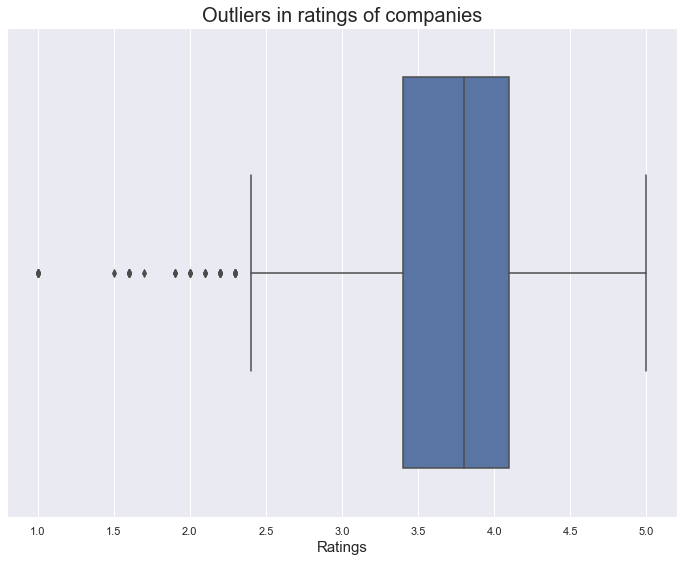

In [441]:
# check outliers in ratings of companies
outliers_rating = dataset['Rating']
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.boxplot(outliers_rating)
sns.set(rc={'figure.facecolor':'(0,0,0,0)'})
plt.title("Outliers in ratings of companies", fontsize=20)
plt.xlabel("Ratings", fontsize=15)
plt.show()

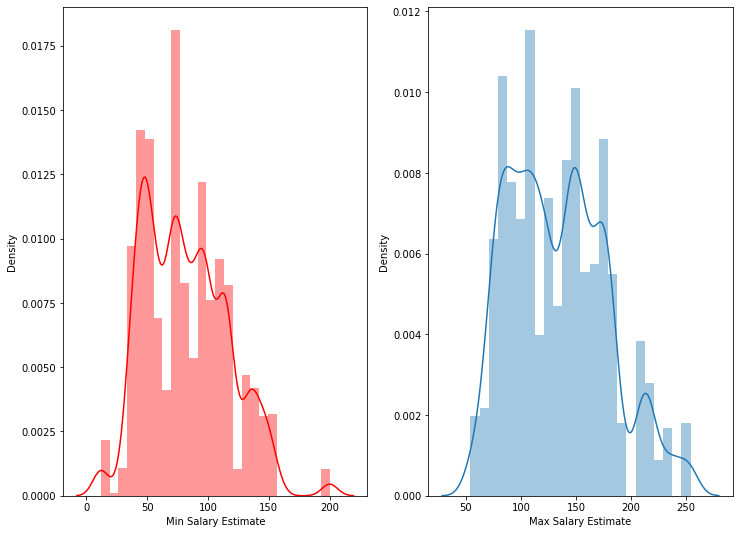

In [236]:
# check minimum and maximum salary distribution
f, axes = plt.subplots(1, 2, figsize=(12, 9))
sns.distplot(dataset['Min Salary Estimate'], color = 'r', ax = axes[0])
sns.distplot(dataset['Max Salary Estimate'], ax = axes[1])
plt.show()

In [253]:
dataset['Job Title'] = dataset['Job Title'].str.replace('Sr.', 'Senior')
dataset.head()

,Job Title,Job Description,Rating,Company Name,Industry,Sector,Easy Apply,Min Salary Estimate,Max Salary Estimate,Location City,Location State,Headquarters City,Headquarters State,Average Salary
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,Travel Agencies,Travel & Tourism,True,111.0,181.0,New York,NY,Montreal,Canada,146.0
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US,"Health, Beauty, & Fitness",Consumer Services,True,111.0,181.0,New York,NY,New York,NY,146.0
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,NaN,NaN,True,111.0,181.0,New York,NY,New York,NY,146.0
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,Internet,Information Technology,True,111.0,181.0,Lyndhurst,NJ,Lyndhurst,NJ,146.0
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,Advertising & Marketing,Business Services,True,111.0,181.0,New York,NY,New York,NY,146.0


In [254]:
# check top 10 jobs by salary
jobs = dataset[['Job Title','Max Salary Estimate']].nlargest(16,"Max Salary Estimate").drop_duplicates()
print(jobs)

                              Job Title  Max Salary Estimate
164                        Data Analyst                254.0
165       Business Intelligence Analyst                254.0
166                Product Data Analyst                254.0
168                      Data Scientist                254.0
169       Lead Data Scientist, R&D Team                254.0
171               Senior Data Scientist                254.0
174                 Data Science Intern                254.0
176       NLP Machine Learning Engineer                254.0
179  Data Analyst, Bitcoin Trading Firm                254.0


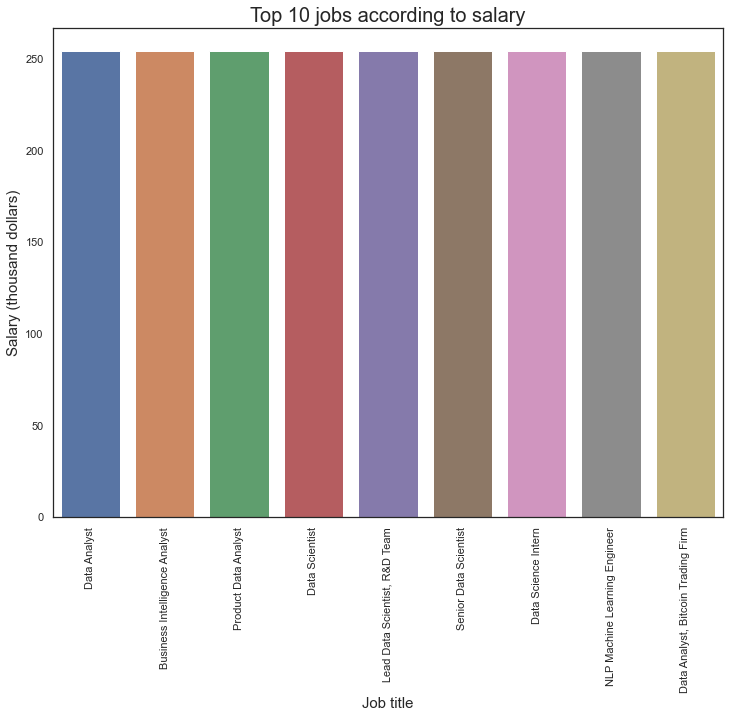

In [257]:
fig = plt.subplots(figsize=(12, 9))
sns.barplot(x=jobs['Job Title'], y=jobs['Max Salary Estimate'])
plt.title("Top 10 jobs according to salary", fontsize=20)
plt.xlabel("Job title", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Salary (thousand dollars)", fontsize=15)
plt.show()

In [140]:
# GROUP by cities to see max and minimum salary #
group_by_cities = dataset.groupby('Location City')[['Min Salary Estimate', 'Max Salary Estimate']].mean().sort_values(['Max Salary Estimate','Min Salary Estimate'],ascending=False).head(20)
group_by_cities

,Min Salary Estimate,Max Salary Estimate
Location City,,
Queens Village,156.000000,254.000000
Rockville Centre,156.000000,254.000000
Stanford,150.000000,237.000000
Franklin Lakes,129.000000,210.000000
Port Washington,129.000000,210.000000
Duarte,132.000000,208.000000
Sherman Oaks,132.000000,208.000000
Livermore,137.500000,202.750000
Redwood City,138.750000,200.687500


In [163]:
fig = go.Figure()
fig.add_trace(go.Bar(
   x = group_by_cities.index,
   y = group_by_cities['Min Salary Estimate'],
   name = 'Minimum Salary',
   hovertemplate="City=%{x}<br>Min Salary=%{y}k<extra></extra>"
))

fig.add_trace(go.Bar(
   x = group_by_cities.index,
   y = group_by_cities['Max Salary Estimate'],
   name = 'Maximum Salary',
   hovertemplate="City=%{x}<br>Max Salary=%{y}k<extra></extra>",
))

fig.update_layout(plot_bgcolor='white', width=900, height=600, title = 'Min and max salaries of top 20 cities', barmode = 'group')
fig.show()

In [251]:
# GROUP by jobs to see max and minimum salary #
max_min_salary_per_job = dataset.groupby('Job Title')[['Min Salary Estimate', 'Max Salary Estimate']].mean().sort_values(['Max Salary Estimate','Min Salary Estimate'],ascending=False).head(25)
max_min_salary_per_job

,Min Salary Estimate,Max Salary Estimate
Job Title,,
"Data Analyst, Bitcoin Trading Firm",156.0,254.0
Data Science Analyst/Engineer,156.0,254.0
"Data Scientist, Voter Data",156.0,254.0
Deployed Data Scientist,156.0,254.0
NLP Machine Learning Engineer,156.0,254.0
"Senior / Data Scientist, Advertising Business",156.0,254.0
"VP, Data Scientist",156.0,254.0
"AI/ML - Machine Learning Engineer, Advanced Development",200.0,250.0
"Community Data Manager, Single-Cell Biology",200.0,250.0


In [252]:
fig = go.Figure()
fig.add_trace(go.Bar(
   x = max_min_salary_per_job.index,
   y = max_min_salary_per_job['Min Salary Estimate'],
   name = 'Minimum Salary',
   hovertemplate="Job=%{x}<br>Min Salary=%{y}k<extra></extra>"
))

fig.add_trace(go.Bar(
   x = max_min_salary_per_job.index,
   y = max_min_salary_per_job['Max Salary Estimate'],
   name = 'Maximum Salary',
   hovertemplate="Job=%{x}<br>Max Salary=%{y}k<extra></extra>"
))

fig.update_layout(width=900, height=600, title = 'Minimum and Maximum salaries of top 25 job titles', barmode = 'stack')
fig.show()

In [189]:
dataset['Average Salary'] = dataset[['Min Salary Estimate', 'Max Salary Estimate']].mean(axis = 1)

In [191]:
fig = px.scatter(dataset, x=dataset['Rating'], y= dataset['Average Salary'])
fig.update_layout(width=900, height=600, title = 'Average salary and ratings correlation')
fig.show()

In [192]:
jobs_per_sector = pd.DataFrame(dataset['Sector'].value_counts())
jobs_per_sector

,Sector
Information Technology,1124
Business Services,679
Biotech & Pharmaceuticals,293
Finance,270
Health Care,197
Insurance,109
Education,101
Manufacturing,87
Government,82
Media,75


In [204]:
jobs_per_industry = pd.DataFrame(dataset['Industry'].value_counts().head(25))
jobs_per_industry

,Industry
IT Services,472
Staffing & Outsourcing,313
Biotech & Pharmaceuticals,293
Computer Hardware & Software,264
Internet,238
Health Care Services & Hospitals,197
Consulting,166
Enterprise Software & Network Solutions,150
Investment Banking & Asset Management,109
Advertising & Marketing,93


In [225]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
#fig = px.pie(jobs_per_sector, values=jobs_per_sector['Sector'], names=jobs_per_sector.index)
fig.add_trace(go.Pie(labels=jobs_per_sector.index, values=jobs_per_sector['Sector'], name="Sector"),1, 1)
fig.add_trace(go.Pie(labels=jobs_per_industry.index, values=jobs_per_industry['Industry'], name="Industry"),1, 2)

fig.update_layout(width=900, height=600, showlegend=False, title = 'Data scientist roles per sector and industry',
    annotations=[dict(text='Sector', x=0.19, y=0.5, font_size=15, showarrow=False),
                 dict(text='Industry', x=0.82, y=0.5, font_size=15, showarrow=False)])
fig.update_traces(hole=.3, textposition='inside', hoverinfo="label+percent+name")
fig.show()

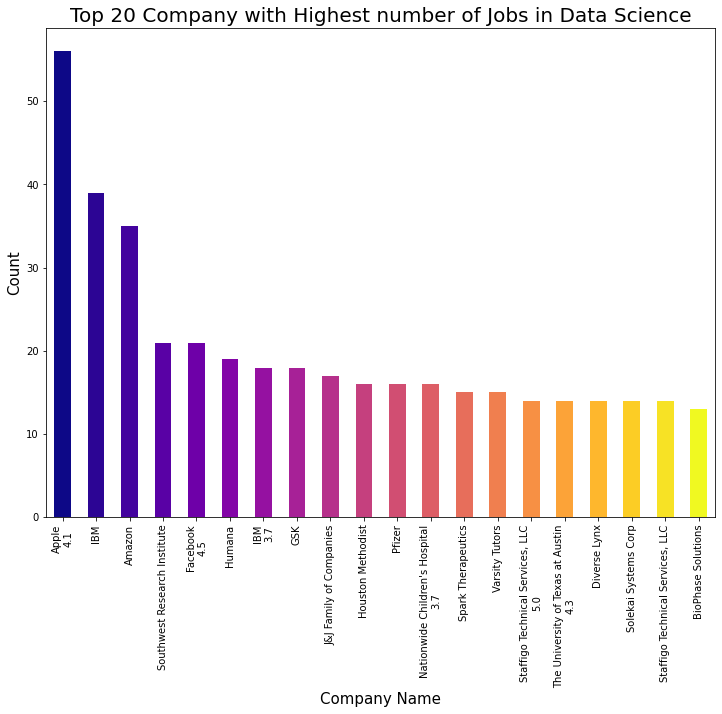

In [233]:
color = plt.cm.plasma(np.linspace(0,1,20))
dataset["Company Name"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.rcParams["figure.figsize"] = (12,9)
plt.title("Top 20 Company with Highest number of Jobs in Data Science",fontsize=20)
plt.xlabel("Company Name", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

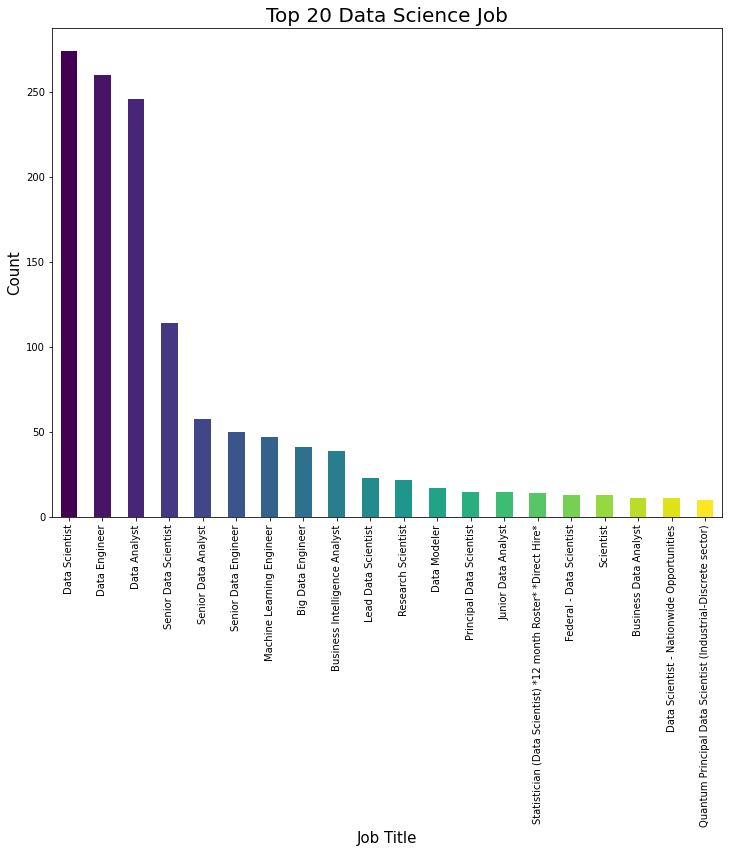

In [242]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.viridis(np.linspace(0,1,20))
dataset["Job Title"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Data Science Job",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [244]:
dataset_by_city=dataset.groupby('Location City')['Job Title'].count().reset_index().sort_values('Job Title',ascending=False).head(20).rename(columns={'Job Title':'Hires'})
sales_by_city = dataset_by_city.merge(dataset,on='Location City',how='left')

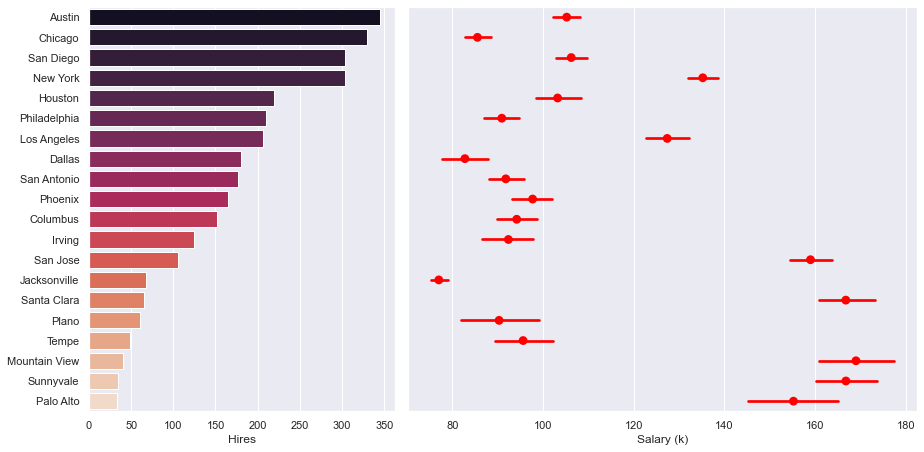

In [479]:
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))

sns.barplot(x='Hires', y='Location City', data=sales_by_city,ax=ax_bar, palette='rocket').set(ylabel="")
sns.pointplot(x='Average Salary', y='Location City', data=sales_by_city, join=False, ax=ax_point, color = 'red').set(ylabel="", xlabel="Salary (k)")

#plt.suptitle('Top 20 Cities Hiring Data Science Jobs', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
f.savefig("cities.png", facecolor='white')

In [358]:
# import dataset of states
USA_states = pd.read_csv("States.csv")
USA_states.head()

,Name,Location State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [380]:
merged_states = dataset.merge(USA_states, on='Location State', how='inner')
merged_states

,Job Title,Job Description,Rating,Company Name,Industry,Sector,Easy Apply,Min Salary Estimate,Max Salary Estimate,Min Company Size,Max Company Size,Location City,Location State,Headquarters City,Headquarters State,Name
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,Travel Agencies,Travel & Tourism,True,111.0,181.0,501.0,1000.0,New York,NY,Montreal,Canada,New York
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US,"Health, Beauty, & Fitness",Consumer Services,True,111.0,181.0,1001.0,5000.0,New York,NY,New York,NY,New York
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,NaN,NaN,True,111.0,181.0,1.0,50.0,New York,NY,New York,NY,New York
3,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,Advertising & Marketing,Business Services,True,111.0,181.0,51.0,200.0,New York,NY,New York,NY,New York
4,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies,Insurance Carriers,Insurance,True,111.0,181.0,201.0,500.0,New York,NY,Hartford,CT,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,IT Services,Information Technology,True,55.0,112.0,201.0,500.0,Dublin,OH,Irving,TX,Ohio
3901,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC",IT Services,Information Technology,True,55.0,112.0,51.0,200.0,Columbus,OH,Woodridge,IL,Ohio
3902,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.",Staffing & Outsourcing,Business Services,True,55.0,112.0,5001.0,10000.0,Dublin,OH,Irving,TX,Ohio
3903,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,Accounting,Accounting & Legal,True,55.0,112.0,1.0,50.0,Dublin,OH,Omaha,NE,Ohio


In [381]:
#dataset.head()
merged_states['Location State'].value_counts()

TX    1253
CA    1069
IL     363
PA     324
NY     313
AZ     295
OH     177
FL      69
NJ      32
DE      10
Name: Location State, dtype: int64

In [417]:
fig = px.choropleth(merged_states,   
    locationmode='USA-states',
    locations='Location State',
    color="Location State",
    featureidkey="Name",
    hover_name = "Name",
    scope="usa",
    labels=merged_states["Location State"],
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.update_layout(paper_bgcolor=None, plot_bgcolor=None, height=300, width=600)
fig.show()

In [258]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
stopwords = set(STOPWORDS)

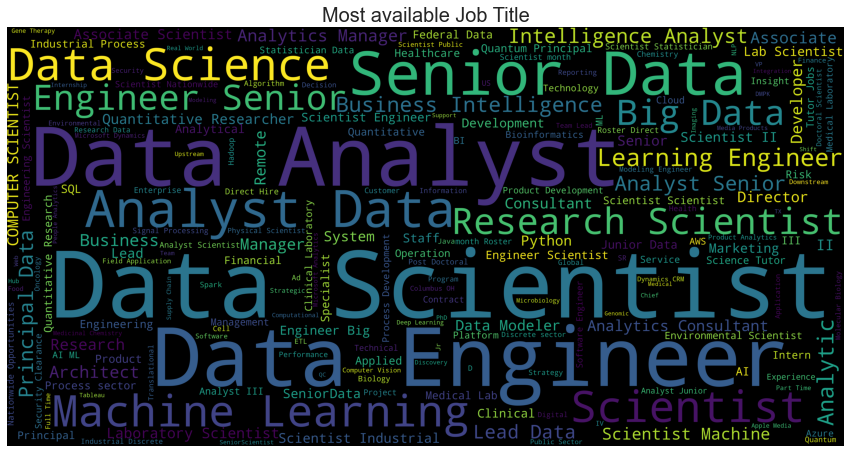

'\nwordcloud = WordCloud(height =3000,width = 6000).generate(str(dataset["Job Title"]))\nplt.rcParams[\'figure.figsize\'] = (15,15)\nplt.axis("off")\nplt.imshow(wordcloud)\nplt.title("Frequently cities")\nplt.show()\n'

In [262]:
wc = WordCloud(height=3000, width=6000)
text = dataset['Job Title']
wc.generate(str(' '.join(text)))
plt.imshow(wc)
plt.axis("off")
plt.title("Most requested roles", fontsize=20)
plt.show()

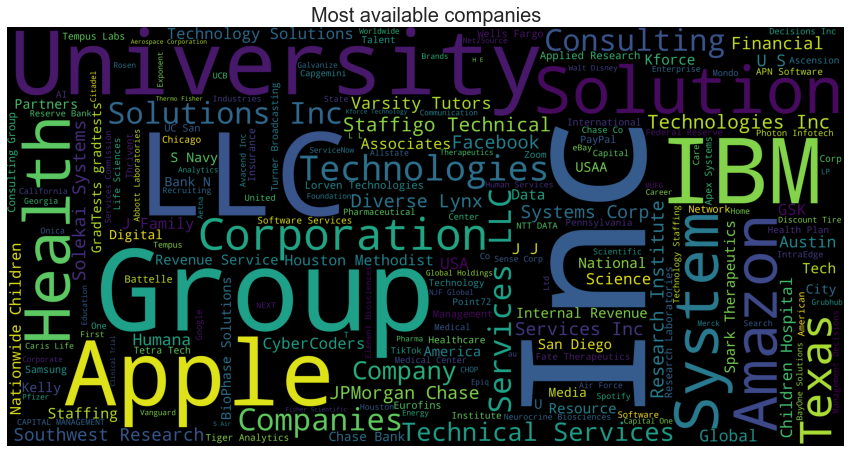

In [264]:
wc = WordCloud(height=3000, width=6000)
text = dataset['Company Name']
wc.generate(str(' '.join(text)))
plt.imshow(wc)
plt.axis("off")
plt.title("Most available companies", fontsize=20)
plt.show()

In [474]:
dataset_salaries = pd.read_csv (r'ds_salaries.csv')
dataset_salaries

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [469]:
#Replacing some of the values to understand the graphs clearly
dataset_salaries.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
dataset_salaries.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)

In [473]:
px.scatter(
    dataset_salaries, x = 'salary_in_usd', y = 'experience_level', 
    size = 'salary_in_usd', hover_name = 'job_title', color = 'job_title', 
    color_discrete_sequence=px.colors.qualitative.Alphabet, 
    template = 'plotly_dark',
    animation_frame = 'work_year', 
    title = 'Experience level VS Salary').update_yaxes(categoryarray = ['Entry', 'Mid', 'Senior', 'Executive'])

In [475]:
salary_location_df = dataset_salaries.groupby("employee_residence").agg(
    mean_salary=('salary_in_usd', 'mean'), count_jobs=('employee_residence', 'count')
).reset_index()
salary_location_df.head(10)

,employee_residence,mean_salary,count_jobs
0,AE,100000.000000,3
1,AR,60000.000000,1
2,AT,76738.666667,3
3,AU,108042.666667,3
4,BE,85699.000000,2
5,BG,80000.000000,1
6,BO,75000.000000,1
7,BR,54634.666667,6
8,CA,97085.310345,29
9,CH,122346.000000,1


In [476]:
from iso3166 import countries
salary_location_df["iso_alpha"] = salary_location_df["employee_residence"].apply(lambda x : countries.get(x).alpha3)
salary_location_df.head()

,employee_residence,mean_salary,count_jobs,iso_alpha
0,AE,100000.000000,3,ARE
1,AR,60000.000000,1,ARG
2,AT,76738.666667,3,AUT
3,AU,108042.666667,3,AUS
4,BE,85699.000000,2,BEL


In [477]:
fig = px.choropleth(
    data_frame=salary_location_df,
    locations="iso_alpha",
    color="mean_salary",
    hover_data=["mean_salary", "count_jobs"],
    title="country wise salaries",
    color_continuous_scale="BuPu"
)

fig.show()